<a href="https://colab.research.google.com/github/tarawalm/myrespository/blob/main/fbprophet_model_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the required libraries
from IPython.display import clear_output
try:
  !pip install pystan pystan~=2.14
  !pip install fbprophet
  !pip install hvplot
  !pip install holoviews
  !pip install yfinance
except:
  print("Error installing libraries")
finally:
  clear_output()
  print("Libraries successfully installed")

Libraries successfully installed


In [ ]:
# Import the required libraries and dependencies
import pandas as pd
import holoviews as hv
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import hvplot.pandas
import datetime as dt
import requests
import yfinance as yf
%matplotlib inline

In [ ]:
# Downloading Yahoo Finance API data
futures_data = yf.download("SPY", start="2017-01-01", end="2022-12-01",interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Stock data from download

display(futures_data.head(5))
display(futures_data.tail(5))

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,203.788071,91366500
2017-01-04,225.619995,226.750000,225.610001,226.580002,205.000412,78744400
2017-01-05,226.270004,226.580002,225.479996,226.399994,204.837524,78379000
2017-01-06,226.529999,227.750000,225.899994,227.210007,205.570419,71559900
2017-01-09,226.910004,227.070007,226.419998,226.460007,204.891891,46939700


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-20,368.029999,372.670013,364.609985,365.410004,365.410004,88283100
2022-10-21,365.119995,374.799988,363.540009,374.290009,374.290009,130897700
2022-10-24,375.890015,380.059998,373.109985,378.869995,378.869995,85436900
2022-10-25,378.790009,385.250000,378.670013,384.920013,384.920013,78846300
2022-10-26,381.619995,387.579987,381.350006,382.019989,382.019989,102630464


In [ ]:
# drop unneeded columns
futures_data.drop(columns=["Open","High","Low","Adj Close","Volume"],inplace=True)
display(futures_data.head(5))
display(futures_data.tail(5))

,Close,predicted
Date,,
2017-01-03,225.240005,NaN
2017-01-04,226.580002,NaN
2017-01-05,226.399994,NaN
2017-01-06,227.210007,NaN
2017-01-09,226.460007,NaN


,Close,predicted
Date,,
2022-10-20,365.410004,NaN
2022-10-21,374.290009,NaN
2022-10-24,378.869995,NaN
2022-10-25,384.920013,NaN
2022-10-26,382.019989,NaN


In [ ]:
# reset index
futures_data = futures_data.reset_index()
display(futures_data.head(5))
display(futures_data.tail(5))

,Date,Close,predicted
0,2017-01-03,225.240005,NaN
1,2017-01-04,226.580002,NaN
2,2017-01-05,226.399994,NaN
3,2017-01-06,227.210007,NaN
4,2017-01-09,226.460007,NaN


,Date,Close,predicted
1460,2022-10-20,365.410004,NaN
1461,2022-10-21,374.290009,NaN
1462,2022-10-24,378.869995,NaN
1463,2022-10-25,384.920013,NaN
1464,2022-10-26,382.019989,NaN


In [ ]:
# Review the data types of the DataFrame using the info function
futures_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1465 non-null   datetime64[ns]
 1   Close   1465 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.0 KB


In [ ]:
display(futures_data.head())
display(futures_data.tail())

,Date,Close
0,2017-01-03,225.240005
1,2017-01-04,226.580002
2,2017-01-05,226.399994
3,2017-01-06,227.210007
4,2017-01-09,226.460007


,Date,Close
1460,2022-10-20,365.410004
1461,2022-10-21,374.290009
1462,2022-10-24,378.869995
1463,2022-10-25,384.920013
1464,2022-10-26,382.019989


In [ ]:
# Label the columns ds and y so that the syntax is recognized by Prophet
futures_data.columns = ['ds', 'y']
display(futures_data.head())
display(futures_data.tail())

,ds,y
0,2017-01-03,225.240005
1,2017-01-04,226.580002
2,2017-01-05,226.399994
3,2017-01-06,227.210007
4,2017-01-09,226.460007


,ds,y
1460,2022-10-20,365.410004
1461,2022-10-21,374.290009
1462,2022-10-24,378.869995
1463,2022-10-25,384.920013
1464,2022-10-26,382.019989


In [ ]:
# Call the Prophet function, store as an object
model_futures_data = Prophet()
model_futures_data

In [ ]:
# Fit the time-series model.
model_futures_data.fit(futures_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Create a future dataframe to hold predictions for Jan 1, 2023
# Make the prediction go out as far as 1656 hours (approx 67 days)
futures_close_data = model_futures_data.make_future_dataframe(periods=1608, freq='H')

In [ ]:
# View the last five rows of the future_data DataFrame
display(futures_data.tail())

,ds,y
1460,2022-10-20,365.410004
1461,2022-10-21,374.290009
1462,2022-10-24,378.869995
1463,2022-10-25,384.920013
1464,2022-10-26,382.019989


In [ ]:
# Make the predictions for the trend data using the future_data DataFrame
futures_close_data = model_futures_data.predict(futures_close_data)

In [ ]:
# Display the last five rows of the future_close_data DataFrame
futures_close_data.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3068,2022-12-31 20:00:00,376.451535,371.094145,401.633174,372.990780,379.148159,10.574727,10.574727,10.574727,1.499458,1.499458,1.499458,9.075270,9.075270,9.075270,0.0,0.0,0.0,387.026262
3069,2022-12-31 21:00:00,376.444246,371.102137,403.088950,372.981181,379.145685,10.525000,10.525000,10.525000,1.437043,1.437043,1.437043,9.087957,9.087957,9.087957,0.0,0.0,0.0,386.969246
3070,2022-12-31 22:00:00,376.436957,370.492876,401.540750,372.971581,379.143211,10.469589,10.469589,10.469589,1.368965,1.368965,1.368965,9.100624,9.100624,9.100624,0.0,0.0,0.0,386.906546
3071,2022-12-31 23:00:00,376.429668,371.130575,402.192184,372.961982,379.140737,10.409004,10.409004,10.409004,1.295735,1.295735,1.295735,9.113269,9.113269,9.113269,0.0,0.0,0.0,386.838672
3072,2023-01-01 00:00:00,376.422379,369.665600,402.065185,372.952383,379.138263,10.343791,10.343791,10.343791,1.217899,1.217899,1.217899,9.125892,9.125892,9.125892,0.0,0.0,0.0,386.766170


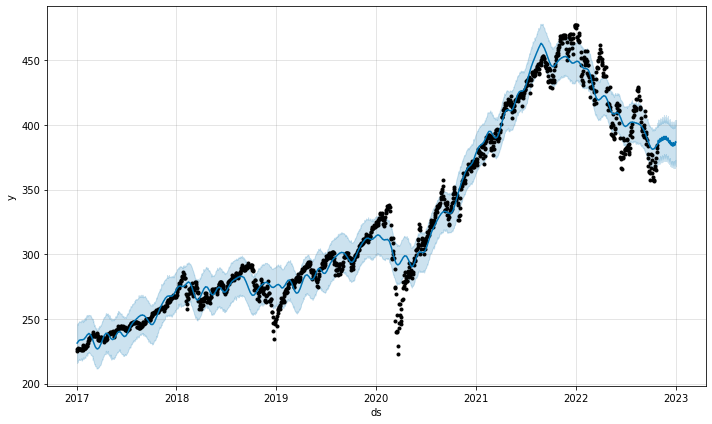

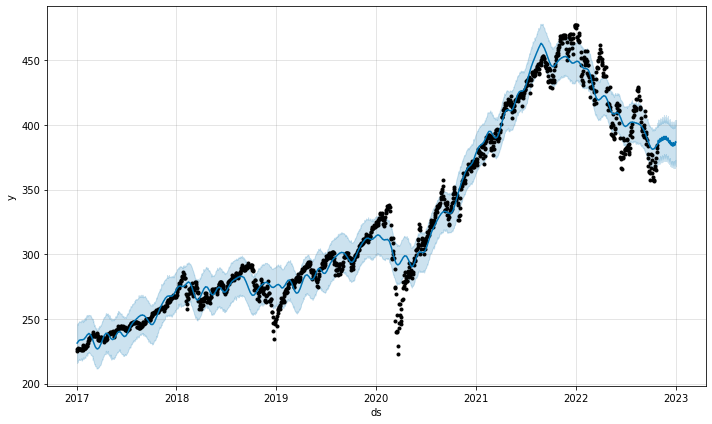

In [ ]:
# Plot the Prophet predictions for the Future Close data
model_futures_data.plot(futures_close_data)

In [ ]:
# Back Testing the FBProphet Data
# We'll be using a shorten date set within the original future's data set to test the accuracy of the FBProphet model against the other Models.

In [ ]:
# Downloading Yahoo Finance API data
futures_data_backtest = yf.download("SPY", start="2017-01-01", end="2021-12-31",interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Stock data from download
display(futures_data_backtest.head(5))
display(futures_data_backtest.tail(5))

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,203.788025,91366500
2017-01-04,225.619995,226.750000,225.610001,226.580002,205.000397,78744400
2017-01-05,226.270004,226.580002,225.479996,226.399994,204.837524,78379000
2017-01-06,226.529999,227.750000,225.899994,227.210007,205.570450,71559900
2017-01-09,226.910004,227.070007,226.419998,226.460007,204.891830,46939700


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-23,468.750000,472.190002,468.640015,470.600006,465.213715,56439700
2021-12-27,472.059998,477.309998,472.010010,477.260010,471.797485,56808600
2021-12-28,477.720001,478.809998,476.059998,476.869995,471.411896,47274600
2021-12-29,476.980011,478.559998,475.920013,477.480011,472.014954,54503000
2021-12-30,477.929993,479.000000,475.670013,476.160004,470.710052,55329000


In [ ]:
# Cleaning up the Backtesting DataFrame
# drop unneeded columns
futures_data_backtest.drop(columns=["Open","High","Low","Adj Close","Volume"],inplace=True)
# reset index
futures_data_backtest = futures_data_backtest.reset_index()
display(futures_data_backtest.head(5))
display(futures_data_backtest.tail(5))

,Date,Close
0,2017-01-03,225.240005
1,2017-01-04,226.580002
2,2017-01-05,226.399994
3,2017-01-06,227.210007
4,2017-01-09,226.460007


,Date,Close
1253,2021-12-23,470.600006
1254,2021-12-27,477.260010
1255,2021-12-28,476.869995
1256,2021-12-29,477.480011
1257,2021-12-30,476.160004


In [ ]:
# Review the data types of the DataFrame using the info function
futures_data_backtest.info()
# Review DataFrame
display(futures_data_backtest.head())
display(futures_data_backtest.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1258 non-null   datetime64[ns]
 1   Close   1258 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.8 KB


,Date,Close
0,2017-01-03,225.240005
1,2017-01-04,226.580002
2,2017-01-05,226.399994
3,2017-01-06,227.210007
4,2017-01-09,226.460007


,Date,Close
1253,2021-12-23,470.600006
1254,2021-12-27,477.260010
1255,2021-12-28,476.869995
1256,2021-12-29,477.480011
1257,2021-12-30,476.160004


In [ ]:
# Label the columns ds and y so that the syntax is recognized by Prophet
futures_data_backtest.columns = ['ds', 'y']
display(futures_data_backtest.head())
display(futures_data_backtest.tail())

,ds,y
0,2017-01-03,225.240005
1,2017-01-04,226.580002
2,2017-01-05,226.399994
3,2017-01-06,227.210007
4,2017-01-09,226.460007


,ds,y
1253,2021-12-23,470.600006
1254,2021-12-27,477.260010
1255,2021-12-28,476.869995
1256,2021-12-29,477.480011
1257,2021-12-30,476.160004


In [ ]:
# Call the Prophet function, store as an object
model_futures_data_backtest = Prophet()
model_futures_data_backtest

In [ ]:
# Fit the time-series model.
model_futures_data_backtest.fit(futures_data_backtest)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Create a future dataframe to hold predictions to Oct 26, 2022
# Make the prediction go out as far as 300 days
futures_close_data_backtest = model_futures_data_backtest.make_future_dataframe(periods=300, freq='D')

In [ ]:
# View the last five rows of the future_data_backtest DataFrame
display(futures_close_data_backtest.tail())

,ds
1553,2022-10-22
1554,2022-10-23
1555,2022-10-24
1556,2022-10-25
1557,2022-10-26


In [ ]:
# Make the predictions for the trend data using the future_data DataFrame
futures_close_data_backtest = model_futures_data_backtest.predict(futures_close_data_backtest)

In [ ]:
# Display the last five rows of the future_close_data DataFrame
futures_close_data_backtest.tail(1)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1557,2022-10-26,565.327871,450.926701,659.635286,458.361693,667.919909,-6.745211,-6.745211,-6.745211,0.345248,0.345248,0.345248,-7.090459,-7.090459,-7.090459,0.0,0.0,0.0,558.58266


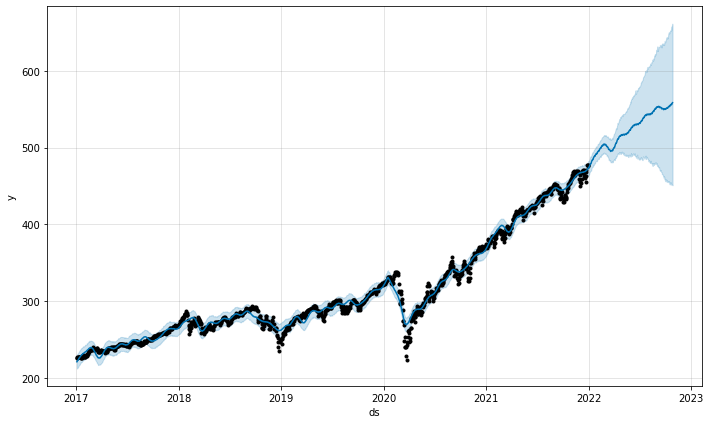

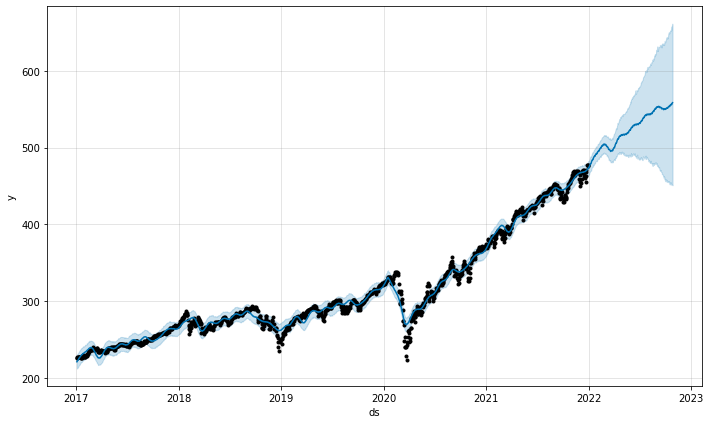

In [ ]:
# Plot the Prophet predictions for the Future Close data
model_futures_data_backtest.plot(futures_close_data_backtest)

In [ ]:
xdf = futures_data
xdf["predicted"] = futures_close_data["yhat"]
xdf

,Date,Close,predicted
0,2017-01-03,225.240005,231.324624
1,2017-01-04,226.580002,231.721568
2,2017-01-05,226.399994,231.978536
3,2017-01-06,227.210007,232.194375
4,2017-01-09,226.460007,233.058153
...,...,...,...
1460,2022-10-20,365.410004,383.228800
1461,2022-10-21,374.290009,383.409166
1462,2022-10-24,378.869995,384.384815
1463,2022-10-25,384.920013,384.857776


In [ ]:
y = xdf["Close"]
predicted_y_values = xdf["predicted"]

In [ ]:
# Compute the metrics for the model
# y = close column of original data frame
# predicted y =  
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The r2 is 0.973581699491149.
The mean squared error is 135.26625343512947.
The root mean squared error is 11.630402118376194.
The standard deviation is 71.55538003474072.
